<a href="https://colab.research.google.com/github/alejandrolq/Text-Mining-Image-Recognition-Hojas-de-Trabajo/blob/main/HojaTrabajo2_TM_IR_21001127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Text Mining & Image Recognition**

**Sección U**

**Hoja de trabajo 2**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

## Problema 1

In [2]:
## Función definida para leer imagenes a color o en escala de grises
def read_img(img, gray_scale=False):
  img_out = cv2.imread(img)
  if gray_scale:
    img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2GRAY)
  return img_out

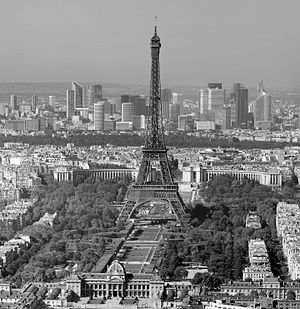

In [3]:
img = read_img('paris.jpg', True)
cv2_imshow(img)

In [4]:
## Función para binarizar imagenes
def binarize_img(img, threshold=100, max_value=255, min_value=0):
  img_out = np.where(img > threshold, max_value, min_value)
  return img_out

In [5]:
img_binarize = binarize_img(img)
img_binarize

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255,   0,   0],
       [255,   0,   0, ..., 255,   0, 255]])

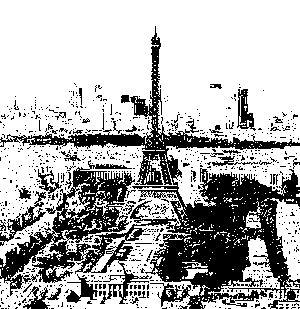

In [6]:
cv2_imshow(img_binarize)

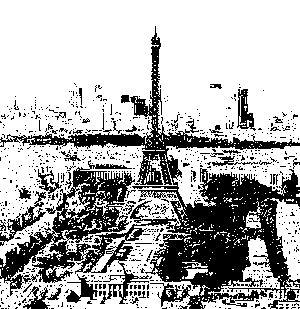

In [7]:
th, image_b = cv2.threshold(src=img, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
cv2_imshow(image_b)

## Problema 2

In [8]:
img_1 = read_img('sacapuntas.jpg')
img_2 = read_img('cadena.jpg')

In [9]:
## Función para realizar las operaciones entre 2 imagenes
def image_operations(img_1, img_2, operation=6):
  alto = img_1.shape[0] 
  ancho = img_1.shape[1]
  color = img_1.shape[2]
  newImg = np.zeros((alto, ancho, color))
  if operation == 1:
    img_1 = img_1.astype('float')
    img_2 = img_2.astype('float')
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          newImg[i,j,k] = (img_1[i,j,k] + img_2[i,j,k])
          if newImg[i,j,k] > 255:
            newImg[i,j,k] = 255
  elif operation == 2:
    img_1 = img_1.astype('float')
    img_2 = img_2.astype('float')
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          newImg[i,j,k] = (img_1[i,j,k] - img_2[i,j,k])
          if newImg[i,j,k] < 0:
            newImg[i,j,k] = 0
  elif operation == 3:
    img_1_binarize = binarize_img(img_1)
    img_2_binarize = binarize_img(img_2)
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          newImg[i,j,k] = np.bitwise_and(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
  elif operation == 4:
    img_1_binarize = binarize_img(img_1)
    img_2_binarize = binarize_img(img_2)
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          newImg[i,j,k] = np.bitwise_or(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
  elif operation == 5:
    img_1_binarize = binarize_img(img_1)
    img_2_binarize = binarize_img(img_2)
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          newImg[i,j,k] = np.bitwise_xor(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
  elif operation == 6:
    img_1_binarize = binarize_img(img_1)
    img_2_binarize = binarize_img(img_2)
    img_1 = img_1.astype('float')
    img_2 = img_2.astype('float')
    newImg_sum = np.zeros((alto, ancho, color))
    newImg_sub = np.zeros((alto, ancho, color))
    newImg_and = np.zeros((alto, ancho, color))
    newImg_or = np.zeros((alto, ancho, color))
    newImg_xor = np.zeros((alto, ancho, color))
    for i in range(0, alto):
      for j in range(0, ancho):
        for k in range(0, color):
          # SUMA
          newImg_sum[i,j,k] = (img_1[i,j,k] + img_2[i,j,k])
          if newImg_sum[i,j,k] > 255:
            newImg_sum[i,j,k] = 255
          # RESTA
          newImg_sub[i,j,k] = (img_1[i,j,k] - img_2[i,j,k])
          if newImg_sub[i,j,k] < 0:
            newImg_sub[i,j,k] = 0
          # AND 
          newImg_and[i,j,k] = np.bitwise_and(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
          # OR
          newImg_or[i,j,k] = np.bitwise_or(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
          # XOR
          newImg_xor[i,j,k] = np.bitwise_xor(img_1_binarize[i,j,k], img_2_binarize[i,j,k])
    return newImg_sum, newImg_sub, newImg_and, newImg_or, newImg_xor
  return newImg

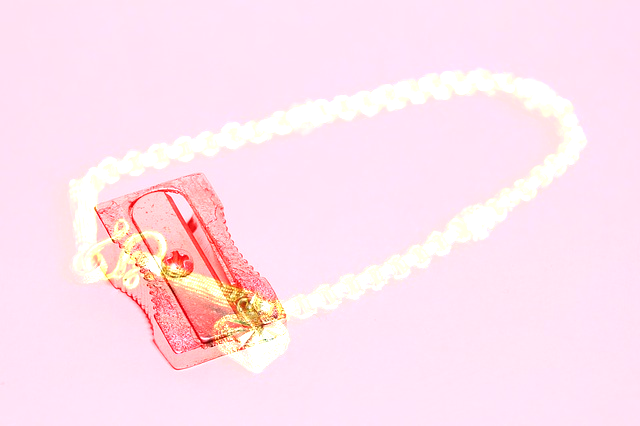

In [10]:
img_out = image_operations(img_1, img_2, operation=1)
cv2_imshow(img_out)

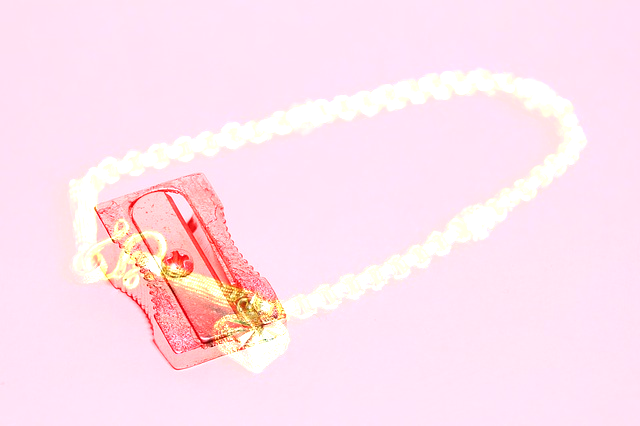

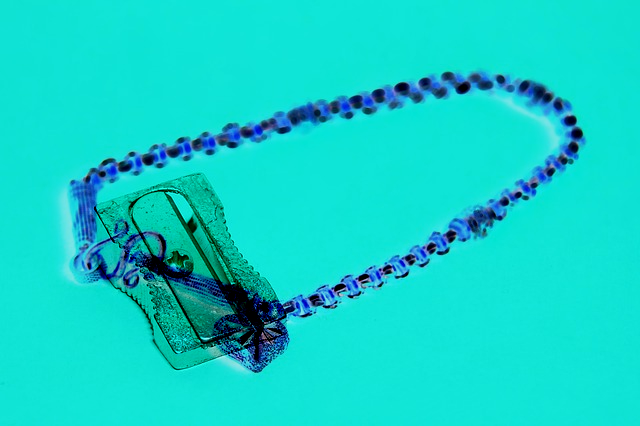

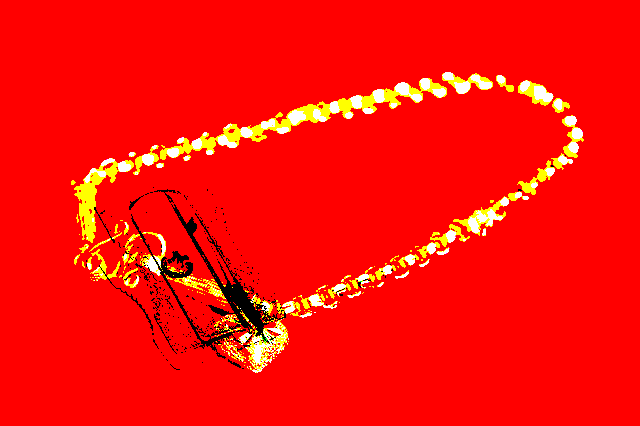

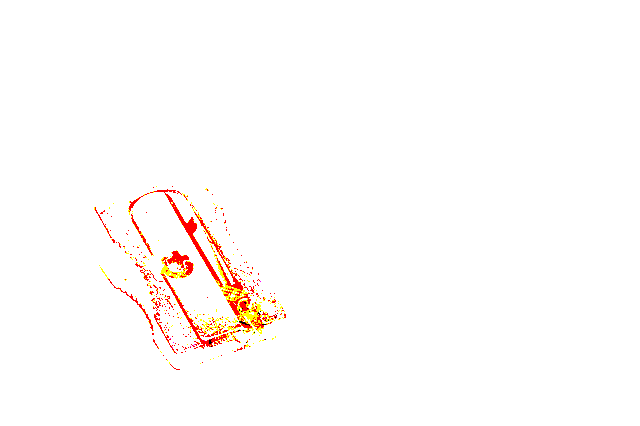

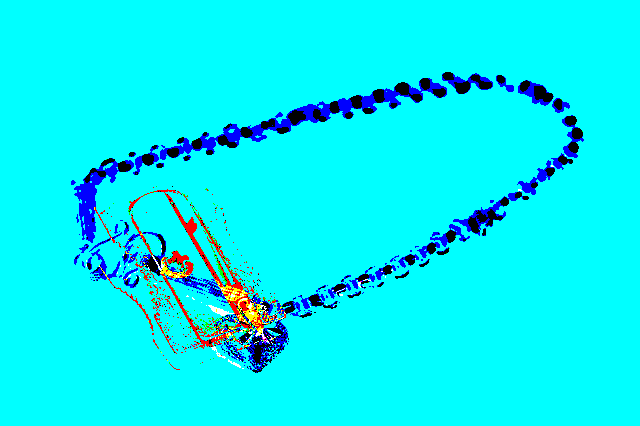

In [11]:
img_out_sum, img_out_sub, img_out_and, img_out_or, img_out_xor = image_operations(img_1, img_2)
cv2_imshow(img_out_sum)
cv2_imshow(img_out_sub)
cv2_imshow(img_out_and)
cv2_imshow(img_out_or)
cv2_imshow(img_out_xor)

## Problema 3

In [17]:
## Función para mostrar los niveles de gris de una imagen en 3D
def plot_3d_gray_scale(img):
  xx, yy = np.mgrid[:img.shape[0], :img.shape[1]]
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
  ax.view_init(70, 0)
  plt.show()

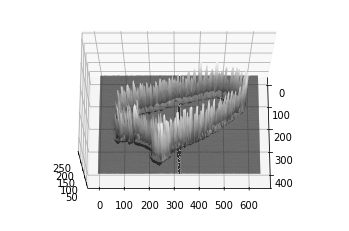

In [18]:
img_3 = read_img('cadena.jpg', True)
plot_3d_gray_scale(img_3)

## Problema 4

In [91]:
## Función para realizar transformaciones de la imagen
def image_transform(img, transformation, alpha=1, betha=0, gamma=1):
  if len(img.shape) > 2:
    alto = img.shape[0] 
    ancho = img.shape[1]
    color = img.shape[2]
  else:
    alto = img.shape[0] 
    ancho = img.shape[1]
    color = 1
  newImg = np.zeros((alto, ancho, color))
  img = img.astype('float')
  for i in range(0, alto):
    for j in range(0, ancho):
      if color > 1:
        for k in range(0, color):
          ## Tranformación Negativa
          if transformation == 1:
            newImg[i,j,k] = 255 - img[i,j,k]
          ## Tranformación Lineal
          elif transformation == 2:
            newImg[i,j,k] = alpha*img[i,j,k] + betha
          ## Tranformación Logaritmica
          elif transformation == 3:
            newImg[i,j,k] = alpha*np.log10(img[i,j,k] + 1)
          ## Tranformación Exponencial
          elif transformation == 4:
            newImg[i,j,k] = alpha*((img[i,j,k])/255)**(gamma)
          if newImg[i,j,k] < 0:
            newImg[i,j,k] = 0
          if newImg[i,j,k] > 255:
            newImg[i,j,k] = 255
      else:
        ## Tranformación Negativa
        if transformation == 1:
          newImg[i,j] = 255 - img[i,j]
        ## Tranformación Lineal
        elif transformation == 2:
          newImg[i,j] = alpha*img[i,j] + betha
        ## Tranformación Logaritmica
        elif transformation == 3:
          newImg[i,j] = alpha*np.log10(img[i,j] + 1)
        ## Tranformación Exponencial
        elif transformation == 4:
          newImg[i,j] = alpha*((img[i,j])/255)**(gamma)
        if newImg[i,j] < 0:
          newImg[i,j] = 0
        if newImg[i,j] > 255:
          newImg[i,j] = 255
  return newImg

In [69]:
img_4 = read_img('cadena.jpg', True)

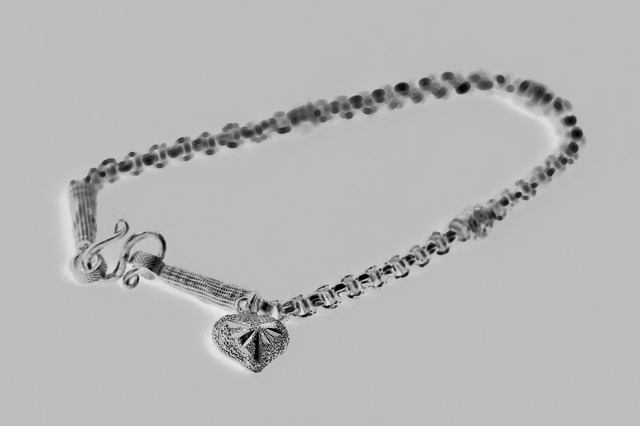

In [70]:
## Transformación Negativa
img_4_out = image_transform(img_4, transformation=1)
cv2_imshow(img_4_out)

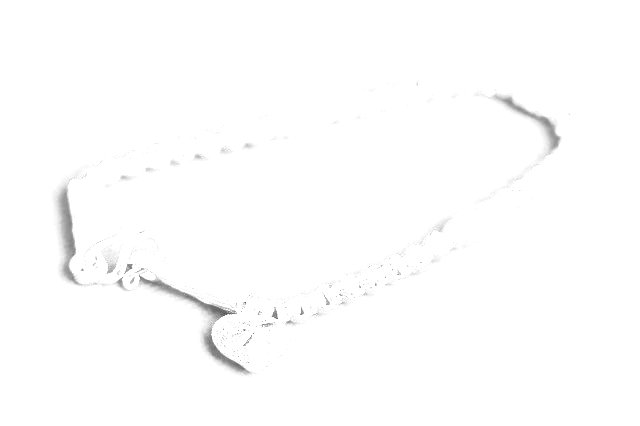

In [80]:
## Transformación Lineal
img_4_out = image_transform(img_4, transformation=2, alpha=4, betha=5)
cv2_imshow(img_4_out)

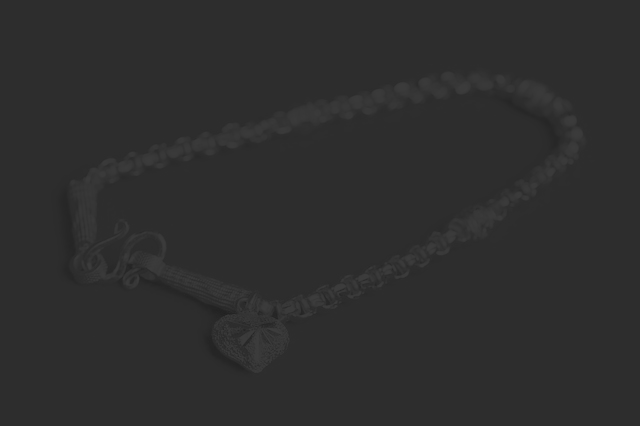

In [85]:
## Transformación Logaritmica
img_4_out = image_transform(img_4, transformation=3, alpha=25)
cv2_imshow(img_4_out)

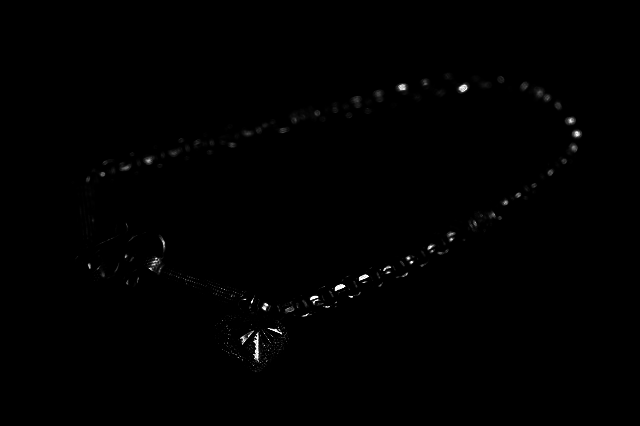

In [90]:
## Transformación Exponencial
img_4_out = image_transform(img_4, transformation=4, alpha=300, gamma=10)
cv2_imshow(img_4_out)

## Problema 5

In [171]:
## Función para aplicar filtros convolucionales
def convolutional_filter(img, kernel):
  if len(img.shape) > 2:
    alto = img.shape[0] 
    ancho = img.shape[1]
    color = img.shape[2]
  else:
    alto = img.shape[0] 
    ancho = img.shape[1]
    color = 1
  altoKernel = kernel.shape[0]
  anchoKernel = kernel.shape[0]
  step = int(anchoKernel/2)
  newImg = np.zeros((alto, ancho, color))
  for i in range(step, alto - step):
    newPixel = 0
    for j in range(step, ancho - step):
      if color > 1:
        for k in range(0, color):
          ventana = img[i-step:i+2*step, j-step:j+2*step, k]
          newPixel = 0
          for m in range(0, altoKernel):
            for n in range(0, anchoKernel):
              newPixel = newPixel + ventana[m, n] * kernel[m, n]
          newImg[i, j, k] = int(newPixel)
      else:
        ventana = img[i-step:i+2*step, j-step:j+2*step]
        newPixel = 0
        for m in range(0, altoKernel):
            for n in range(0, anchoKernel):
                newPixel = newPixel + ventana[m, n] * kernel[m, n]
        newImg[i, j] = int(newPixel)
  plt.imshow(cv2.cvtColor(np.float32((img/255)), cv2.COLOR_BGR2RGB))
  plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
  plt.show()
  plt.imshow(cv2.cvtColor(np.float32((newImg/255)), cv2.COLOR_BGR2RGB))
  plt.title('Imagen Procesada'), plt.xticks([]), plt.yticks([])
  plt.show()
  return newImg
  

In [188]:
img_5 = read_img('paris.jpg', True)
img_5 = binarize_img(img_5)

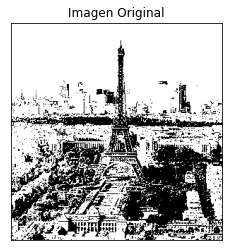

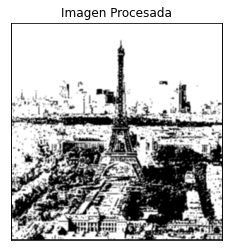

In [189]:
kernel = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
img_fg = convolutional_filter(img_5, kernel)

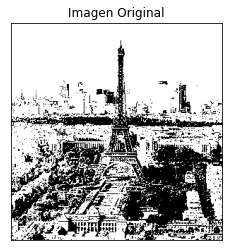

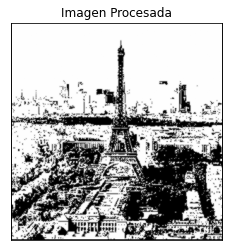

In [190]:
kernel = np.array([[1/18., 1/18., 1/18.], [1/18., 10/18., 1/18.], [1/18., 1/18., 1/18.]])
img_fg = convolutional_filter(img_5, kernel)

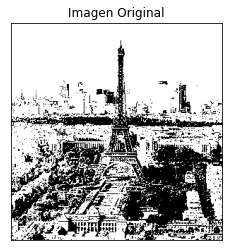

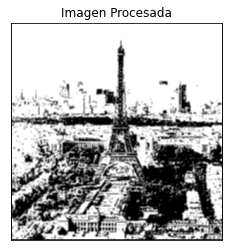

In [191]:
kernel = np.array([[1/9., 1/9., 1/9.], [1/9., 1/9., 1/9.], [1/9., 1/9., 1/9.]])
img_fg = convolutional_filter(img_5, kernel)